In [2]:
import pandas as pd

data = {
    'Nome': ['João', 'Maria', 'Pedro', 'Ana', 'Luiz'],
    'Idade': [25, 30, 22, 28, 35],
    'Cargo': ['Analista', 'Gerente', 'Analista', 'Coordenador', 'Gerente'],
    'Salário': [3500, 5000, 3200, 4800, 5500],
    'Departamento': ['RH', 'Vendas', 'RH', 'TI', 'Vendas']
}

df = pd.DataFrame(data)
df


,Nome,Idade,Cargo,Salário,Departamento
0,João,25,Analista,3500,RH
1,Maria,30,Gerente,5000,Vendas
2,Pedro,22,Analista,3200,RH
3,Ana,28,Coordenador,4800,TI
4,Luiz,35,Gerente,5500,Vendas


Questão 1: Quais são os **nomes e cargos dos funcionários** que têm salário maior ou igual a 5000?

**Aqui podemos realizar uma filtragem simples com o loc ou com condição lógica para os salários iguais ou maiores que 5000**

In [3]:
# Filtragem com o loc
maior_5000_loc = df.loc[df["Salário"] >= 5000]
maior_5000_loc

# Filtragem com condição lógica
maior_5000 = df[df["Salário"] >= 5000]
maior_5000

,Nome,Idade,Cargo,Salário,Departamento
1,Maria,30,Gerente,5000,Vendas
4,Luiz,35,Gerente,5500,Vendas


Questão 2: **Quantos** funcionários com idade **entre 25 e 30 anos** trabalham no departamento de RH?

In [18]:
# Aqui tem um erro na verdade
Funcionarios_RH = df.loc[(df["Idade"]>=25) & (df["Idade"]<=30) & (df["Departamento"]=="RH")]
Funcionarios_RH

KeyError: 'Idade'

In [5]:
Funcionarios_RH = df.loc[(df["Departamento"] == "RH")]
Funcionarios_RH["Nome"].count()

2

Questão 3: Qual é o **salário médio** dos gerentes no departamento de Vendas?

In [6]:
Salario_Medio = df.loc[(df["Departamento"] == "Vendas")]
Salario_Medio["Salário"].mean()

5250.0

**<h2> Exercicios de análise de dados </h2>**

In [7]:
import pandas as pd
import numpy as np

# Crie um DataFrame de exemplo com dados fictícios de vendas
data = {
    'Data': pd.date_range(start='2023-01-01', periods=100),
    'Loja': np.random.choice(['Norte-Shopping', 'Nova-America', 'Barra-Shopping'], size=100),
    'Produto': np.random.choice(['X', 'Y', 'Z'], size=100),
    'Vendas': np.random.randint(1, 100, size=100),
    'Desconto': np.random.uniform(0, 0.3, size=100)
}

df = pd.DataFrame(data)
df

,Data,Loja,Produto,Vendas,Desconto
0,2023-01-01,Norte-Shopping,Y,10,0.115041
1,2023-01-02,Barra-Shopping,X,62,0.295732
2,2023-01-03,Barra-Shopping,Z,28,0.097151
3,2023-01-04,Norte-Shopping,Z,52,0.157104
4,2023-01-05,Nova-America,X,16,0.095578
...,...,...,...,...,...
95,2023-04-06,Barra-Shopping,Y,61,0.021274
96,2023-04-07,Norte-Shopping,Y,33,0.134047
97,2023-04-08,Nova-America,Z,27,0.024016
98,2023-04-09,Barra-Shopping,X,66,0.246772


**Como você calcularia a média das vendas mensais para cada loja?**

Como temos que calcular a média mensal, precisamos primeira selecionar as datas pelos meses.

In [8]:
# criando uma coluna para os meses
df["mês"] = df["Data"].dt.month
df

,Data,Loja,Produto,Vendas,Desconto,mês
0,2023-01-01,Norte-Shopping,Y,10,0.115041,1
1,2023-01-02,Barra-Shopping,X,62,0.295732,1
2,2023-01-03,Barra-Shopping,Z,28,0.097151,1
3,2023-01-04,Norte-Shopping,Z,52,0.157104,1
4,2023-01-05,Nova-America,X,16,0.095578,1
...,...,...,...,...,...,...
95,2023-04-06,Barra-Shopping,Y,61,0.021274,4
96,2023-04-07,Norte-Shopping,Y,33,0.134047,4
97,2023-04-08,Nova-America,Z,27,0.024016,4
98,2023-04-09,Barra-Shopping,X,66,0.246772,4


In [9]:
media_mensal = df.groupby(["mês","Loja"])["Vendas"].mean()
media_mensal

mês  Loja          
1    Barra-Shopping    52.666667
     Norte-Shopping    49.615385
     Nova-America      52.833333
2    Barra-Shopping    52.000000
     Norte-Shopping    43.250000
     Nova-America      63.833333
3    Barra-Shopping    51.285714
     Norte-Shopping    42.333333
     Nova-America      45.666667
4    Barra-Shopping    51.500000
     Norte-Shopping    30.250000
     Nova-America      29.500000
Name: Vendas, dtype: float64

In [10]:
media_mensal = df[["Vendas", "mês", "Loja"]]
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    52.032258
Norte-Shopping    43.675000
Nova-America      53.551724
Name: Vendas, dtype: float64

In [11]:
media_mensal.groupby(["Loja"])["Vendas"].mean()

Loja
Barra-Shopping    52.032258
Norte-Shopping    43.675000
Nova-America      53.551724
Name: Vendas, dtype: float64

Qual foi a loja que teve o maior valor de vendas em um único mês?

In [12]:
vendas_janeiro = media_mensal[media_mensal["mês"]==1]
vendas_janeiro

,Vendas,mês,Loja
0,10,1,Norte-Shopping
1,62,1,Barra-Shopping
2,28,1,Barra-Shopping
3,52,1,Norte-Shopping
4,16,1,Nova-America
5,88,1,Barra-Shopping
6,74,1,Norte-Shopping
7,32,1,Barra-Shopping
8,91,1,Norte-Shopping
9,42,1,Norte-Shopping


In [13]:
vendas_janeiro.groupby(["mês","Loja"])["Vendas"].max().sort_values(ascending=False)

mês  Loja          
1    Barra-Shopping    97
     Norte-Shopping    91
     Nova-America      90
Name: Vendas, dtype: int32

Qual foi o mês com o menor valor total de vendas?

In [14]:
menor_mes = media_mensal.groupby(["mês"])["Vendas"].sum().sort_values()
menor_mes


mês
4     386
3    1405
2    1528
1    1594
Name: Vendas, dtype: int32

Como você filtraria apenas as vendas com desconto superior a 20%?

In [15]:
desconto_20 = df.loc[df["Desconto"]>0.20]
desconto_20

desconto_20 = df[df["Desconto"]>0.20]
desconto_20

,Data,Loja,Produto,Vendas,Desconto,mês
1,2023-01-02,Barra-Shopping,X,62,0.295732,1
5,2023-01-06,Barra-Shopping,Z,88,0.296905,1
8,2023-01-09,Norte-Shopping,Z,91,0.291369,1
9,2023-01-10,Norte-Shopping,Z,42,0.291336,1
10,2023-01-11,Barra-Shopping,Z,30,0.207943,1
11,2023-01-12,Norte-Shopping,X,82,0.254548,1
18,2023-01-19,Norte-Shopping,X,48,0.204944,1
19,2023-01-20,Norte-Shopping,Z,68,0.241881,1
22,2023-01-23,Nova-America,X,44,0.230769,1
23,2023-01-24,Barra-Shopping,X,65,0.202212,1


Como você calcularia as estatísticas resumidas (soma, média e máximo) para cada loja?

In [16]:
estatisticas_loja = df.groupby([df["Loja"]]).agg({
    'Vendas': ['sum', 'mean', 'max'],
    'Desconto': 'mean'
}).reset_index()

estatisticas_loja

Loja Vendas                 Desconto
                     sum       mean max      mean
0  Barra-Shopping   1613  52.032258  97  0.137413
1  Norte-Shopping   1747  43.675000  96  0.136814
2    Nova-America   1553  53.551724  99  0.146505

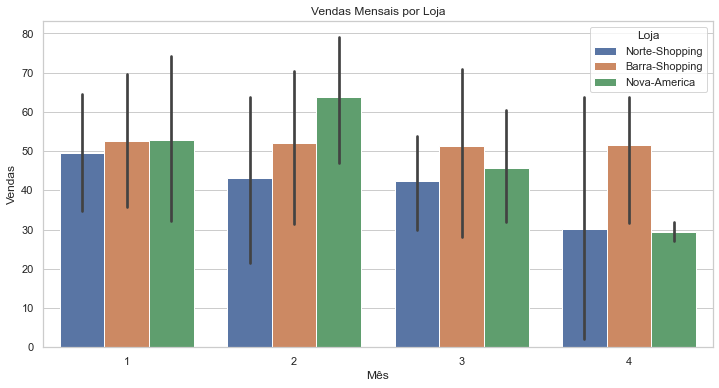

In [17]:
# 4. Criar um gráfico de barras das vendas mensais por loja
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plot = sns.barplot(x="mês", y="Vendas", hue="Loja", data=df)
plt.title('Vendas Mensais por Loja')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()